# MOVIES DATASET

Peforming a correllation analysis with the dataset

This dataset can be found on Kaggle.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)
                    
pd.set_option("display.float_format", "{:.2f}".format)                   

In [2]:
#Read in the dataset

df = pd.read_csv(r"C:\Users\Henry Oguns\Desktop\DATA ANALYSIS\Portfolio Projects\Alex Portfolio\PortfolioProjects-main\movies.csv")

In [3]:
# Loading the 5 first rows 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00


In [4]:
# Checking the percentile of missing values in the dataset

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#Understanding the data to check for null values, memeory used and dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# To get the correct year for the release, i had to split it for the month and year to get them

df['releasednew'] =df['released'].astype(str).str[:13]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasednew
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00,"July 25, 1980"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00,"October 23, 2"
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00,"February 7, 2"
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN,"April 27, 202"
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00,"October 1, 20"


In [7]:
# Obtaining the correct year and month of the release date of the movies

df[['month', 'yearcorrect']] = df['releasednew'].str.split(',', 2, expand = True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasednew,month,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00,"June 13, 1980",June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00,"July 2, 1980",July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00,"June 20, 1980",June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00,"July 2, 1980",July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00,"July 25, 1980",July 25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00,"October 23, 2",October 23,2
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00,"February 7, 2",February 7,2
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN,"April 27, 202",April 27,202
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00,"October 1, 20",October 1,20


In [8]:
# Ordering the data by the gross column to obtain the highest income

df.sort_values(by=['gross'], inplace=False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasednew,month,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00,"December 18,",December 18,
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00,"April 26, 201",April 26,201
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00,"December 19,",December 19,
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00,"December 18,",December 18,
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00,"April 27, 201",April 27,201


Avatar from 2009 is the gross of $284,724,6203

In [9]:
# Drop any duplicates
 
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasednew,month,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00,"June 13, 1980",June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00,"July 2, 1980",July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00,"June 20, 1980",June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00,"July 2, 1980",July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00,"July 25, 1980",July 25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00,"October 23, 2",October 23,2
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00,"February 7, 2",February 7,2
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN,"April 27, 202",April 27,202
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00,"October 1, 20",October 1,20


In [10]:
# Budget high correlation
# Company high correlation

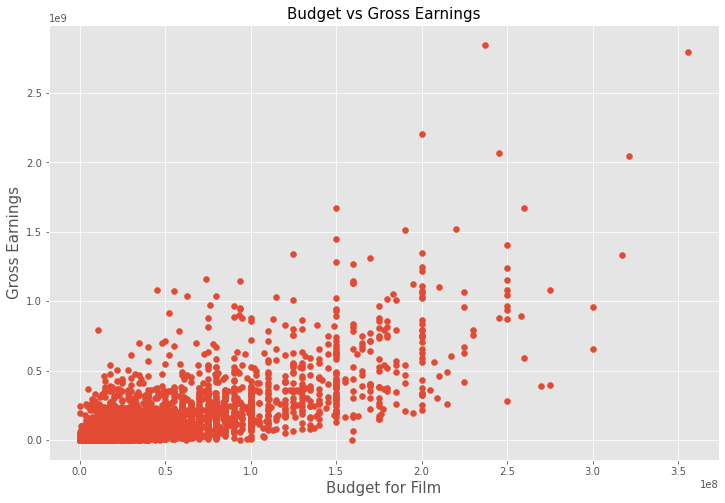

In [11]:
# Scatter plot with budget against gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings', fontsize = 15)

plt.xlabel('Budget for Film', fontsize = 15)
           
plt.ylabel('Gross Earnings', fontsize = 15)
           
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

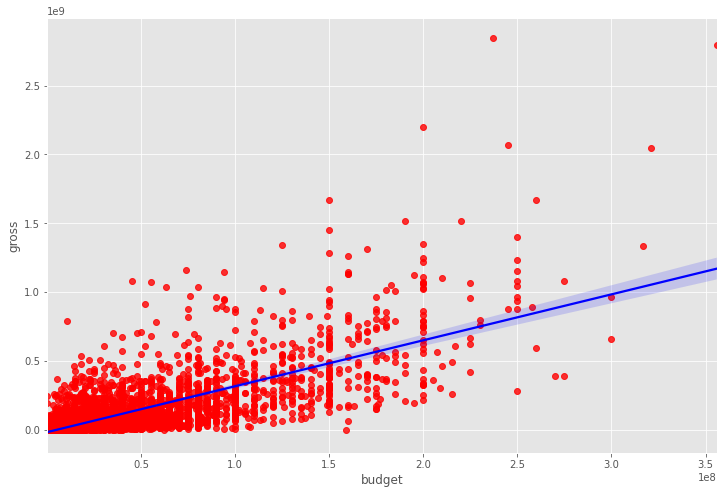

In [12]:
# Plotting budget against gross to see if it has any correllation

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'}) 

In [13]:
# Lets start looking at correlation

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.22,0.33,0.26,0.12
score,0.10,1.00,0.41,0.08,0.19,0.40
votes,0.22,0.41,1.00,0.44,0.63,0.31
budget,0.33,0.08,0.44,1.00,0.74,0.32
gross,0.26,0.19,0.63,0.74,1.00,0.25
runtime,0.12,0.40,0.31,0.32,0.25,1.00


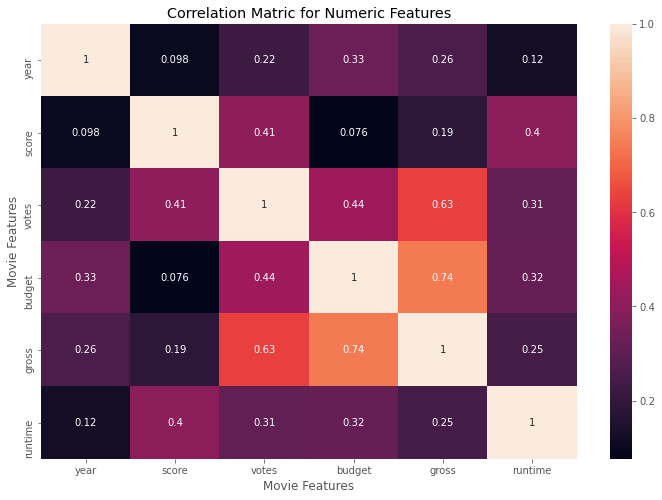

In [14]:
# showing the correlation metrix and observing the heat map

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')
           
plt.ylabel('Movie Features')

plt.show()

In [15]:
# High correlation between budget and gross
# i was right

In [16]:
#look at the company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasednew,month,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00,"June 13, 1980",June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00,"July 2, 1980",July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00,"June 20, 1980",June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00,"July 2, 1980",July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00,"July 25, 1980",July 25,1980


In [17]:
# Changing the object type of the dataset to category type 
# in other to correlate them as they turn to numbers


df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasednew,month,yearcorrect
0,6587,6,6,1980,1705,8.40,927000.00,2589,4014,1047,54,19000000.00,46998772.00,2319,146.00,697,212,5
1,5573,6,1,1980,1492,5.80,65000.00,2269,1632,327,55,4500000.00,58853106.00,731,104.00,498,188,6
2,5142,4,0,1980,1771,8.70,1200000.00,1111,2567,1745,55,18000000.00,538375067.00,1540,124.00,755,223,5
3,286,4,4,1980,1492,7.70,221000.00,1301,2000,2246,55,3500000.00,83453539.00,1812,88.00,498,188,6
4,1027,6,4,1980,1543,7.30,108000.00,1054,521,410,55,6000000.00,39846344.00,1777,98.00,547,194,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.10,18.00,1500,2289,2421,55,7000.00,NaN,-1,90.00,1398,366,66
7664,1678,-1,4,2020,1107,4.70,36.00,774,2614,1886,55,NaN,NaN,539,90.00,326,138,66
7665,4717,-1,6,2020,193,5.70,29.00,2061,2683,2040,55,58750.00,NaN,941,NaN,97,32,130
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.00,NaN,-1,120.00,1365,348,67


In [18]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasednew,month,yearcorrect
0,6587,6,6,1980,1705,8.40,927000.00,2589,4014,1047,54,19000000.00,46998772.00,2319,146.00,697,212,5
1,5573,6,1,1980,1492,5.80,65000.00,2269,1632,327,55,4500000.00,58853106.00,731,104.00,498,188,6
2,5142,4,0,1980,1771,8.70,1200000.00,1111,2567,1745,55,18000000.00,538375067.00,1540,124.00,755,223,5
3,286,4,4,1980,1492,7.70,221000.00,1301,2000,2246,55,3500000.00,83453539.00,1812,88.00,498,188,6
4,1027,6,4,1980,1543,7.30,108000.00,1054,521,410,55,6000000.00,39846344.00,1777,98.00,547,194,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.10,18.00,1500,2289,2421,55,7000.00,NaN,-1,90.00,1398,366,66
7664,1678,-1,4,2020,1107,4.70,36.00,774,2614,1886,55,NaN,NaN,539,90.00,326,138,66
7665,4717,-1,6,2020,193,5.70,29.00,2061,2683,2040,55,58750.00,NaN,941,NaN,97,32,130
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.00,NaN,-1,120.00,1365,348,67


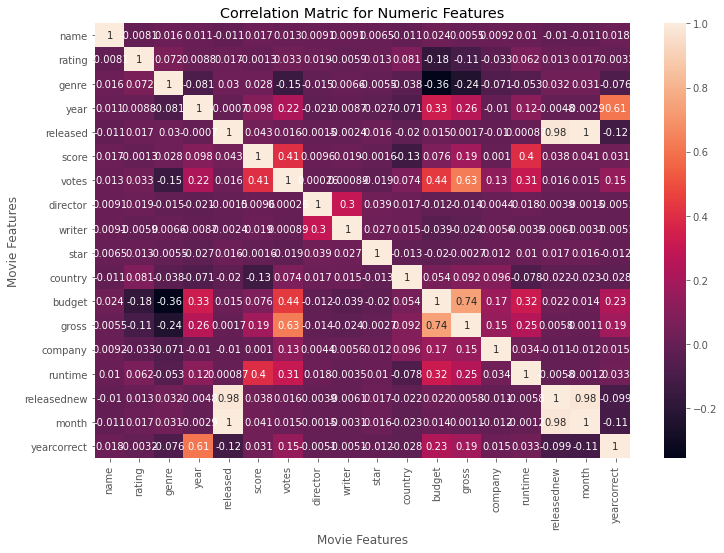

In [19]:
# showing the correlation metrix and observing the heat map

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')
           
plt.ylabel('Movie Features')

plt.show()

In [20]:
# Undestanding the pairs in the dataset that are pair to each other

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.00
             rating        -0.01
             genre          0.02
             year           0.01
             released      -0.01
                            ... 
yearcorrect  company        0.02
             runtime        0.03
             releasednew   -0.10
             month         -0.11
             yearcorrect    1.00
Length: 324, dtype: float64

In [21]:
# Sorting in out this pairs in other to use them by sorting by the highest values in the dataset


sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.36
budget       genre         -0.36
genre        gross         -0.24
gross        genre         -0.24
budget       rating        -0.18
                            ... 
gross        gross          1.00
company      company        1.00
runtime      runtime        1.00
writer       writer         1.00
yearcorrect  yearcorrect    1.00
Length: 324, dtype: float64

In [22]:
# Sorting for the high correlation after sorting them out

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

year         yearcorrect   0.61
yearcorrect  year          0.61
votes        gross         0.63
gross        votes         0.63
             budget        0.74
budget       gross         0.74
releasednew  released      0.98
released     releasednew   0.98
month        releasednew   0.98
releasednew  month         0.98
released     month         1.00
month        released      1.00
name         name          1.00
releasednew  releasednew   1.00
rating       rating        1.00
genre        genre         1.00
year         year          1.00
released     released      1.00
score        score         1.00
votes        votes         1.00
month        month         1.00
director     director      1.00
star         star          1.00
country      country       1.00
budget       budget        1.00
gross        gross         1.00
company      company       1.00
runtime      runtime       1.00
writer       writer        1.00
yearcorrect  yearcorrect   1.00
dtype: float64

In [23]:
# i was right when i said there is correlation between budget and gross

# Also from the above, we would note that votes and budget have the highest correlation to gross earnings